In [3]:
from google.colab import files
uploaded = files.upload()

Saving Pakistan Startup Census.csv to Pakistan Startup Census.csv


In [4]:
import plotly as py
import plotly.express as px
py.offline.init_notebook_mode(connected=True)
import pandas as pd
import numpy as np
import wordcloud as wcd
import re

In [5]:
import os
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from tqdm import tqdm_notebook #gives a progress bar
import seaborn as sns

In [6]:
!pip install folium

In [7]:
# Maps
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim

# Matplot
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn-whitegrid')
import matplotlib.image as mpimg

In [8]:
# NLP/WordCloud
import nltk
from collections import Counter
import regex as re
from wordcloud import WordCloud

#Images
from PIL import Image

# Additional Libraries
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore")
from scipy import stats

In [10]:
# Load data
data = pd.read_csv("Pakistan Startup Census.csv")

In [11]:
print(data.shape)

(553, 7)


In [12]:
data.head()

Name  ...                                        Description
0                            Outnet  ...  24Grey is a T4M (technology for marketing) com...
1                            7Vals   ...  We're changing the way businesses work by maki...
2                        92Solution  ...  92 Solution is a Software & Website Developmen...
3  A2Z Yellow Pages & Info Services  ...  A2Z| Yellow Pages Pakistan will be the innovat...
4                          AALogics  ...  IT Consulting  Web development & Designing  Lo...

[5 rows x 7 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         433 non-null    object
 1   Location     433 non-null    object
 2   Tagline      431 non-null    object
 3   Category     433 non-null    object
 4   Website      418 non-null    object
 5   Founded      433 non-null    object
 6   Description  390 non-null    object
dtypes: object(7)
memory usage: 30.4+ KB


In [14]:
data = data.dropna(how='all')
print(data.shape)

(433, 7)


In [15]:
#convert datatype to string
data[['Name','Location','Tagline','Category','Website','Founded','Description']] = data[['Name','Location','Tagline','Category','Website','Founded','Description']].astype('string')
print(data.dtypes)

Name           string
Location       string
Tagline        string
Category       string
Website        string
Founded        string
Description    string
dtype: object


In [16]:
# this will isolate only the year, which is all we want
data[['Founded','Month','Year']] = data.Founded.str.split(" ", n=2,expand=True)
data = data[~data.Founded.str.contains("-")]

data.loc[data['Year'].isnull(),'Year'] = data['Founded']

data = data.drop(['Founded','Month'], axis=1)
data = data.rename(columns={'Year':'Founded'})
# strip empty spaces
data['Founded'] = data.Founded.str.strip()
data = data[data['Founded'].astype(bool)].reset_index()
data = data.drop('index', axis=1)

data['Founded'] = data['Founded'].astype('int')

In [17]:
# create new dataset that drops any location not in Pakistan
a = ["States",'Raleigh', 'York','USA','Canada','England', 'California', 'Los','South','Amsterdam']
pak = data[~data.Location.str.contains('|'.join(a))]
# Make location data only city names
city = set(['Karachi', 'Lahore', 'Islamabad','Faisalabad','Rawalpindi',
        'Peshawar','Gujrat','Sialkot','Hyderabad','Multan','Sargodha',
        'Faisalabad','Quetta','Wah','Gujranwala','Pakhtunkhwa'
       ])


pak['City'] = pak.Location.str.extract('({0})'.format('|'.join(city)))

In [18]:
geolocator = Nominatim(user_agent="example")

lat = []
lon = []
for j in pak['City']:
    try:
        loc = geolocator.geocode(j).raw
        lat.append(loc['lat'])
        lon.append(loc['lon'])
    except:
        lat.append(np.nan)
        lon.append(np.nan) 
# convert to series and add as column in dataset
la = pd.Series(lat)
lo = pd.Series(lon)

pak['Lat'] = la.values
pak['Lon'] = lo.values

pak[['Lat','Lon']] = pak[['Lat','Lon']].astype(float)

In [19]:
#add some noise to each item in the series because they won't all be at the exact same GPS
pak['Lat'] = pak['Lat'].apply(lambda x: x + np.random.rand()/10.0)
pak['Lon'] = pak['Lon'].apply(lambda x: x + np.random.rand()/10.0)

print(pak.shape)
pak.head()

(343, 10)


Name           Location  ...        Lat        Lon
0                            Outnet  Karachi  Pakistan  ...  24.896032  67.043305
1                            7Vals    Lahore  Pakistan  ...  31.611740  74.318628
2                        92Solution   Lahore  Pakistan  ...  31.620025  74.384130
3  A2Z Yellow Pages & Info Services             Lahore  ...  31.620572  74.391102
4                          AALogics  Karachi  Pakistan  ...  24.907768  67.077918

[5 rows x 10 columns]

In [29]:
startup_dist = data.loc[data['Founded'] >1999]
from google.colab import files
uploaded = files.upload()



Saving 2020_7$largeimg_1108982037.jpg to 2020_7$largeimg_1108982037 (1).jpg


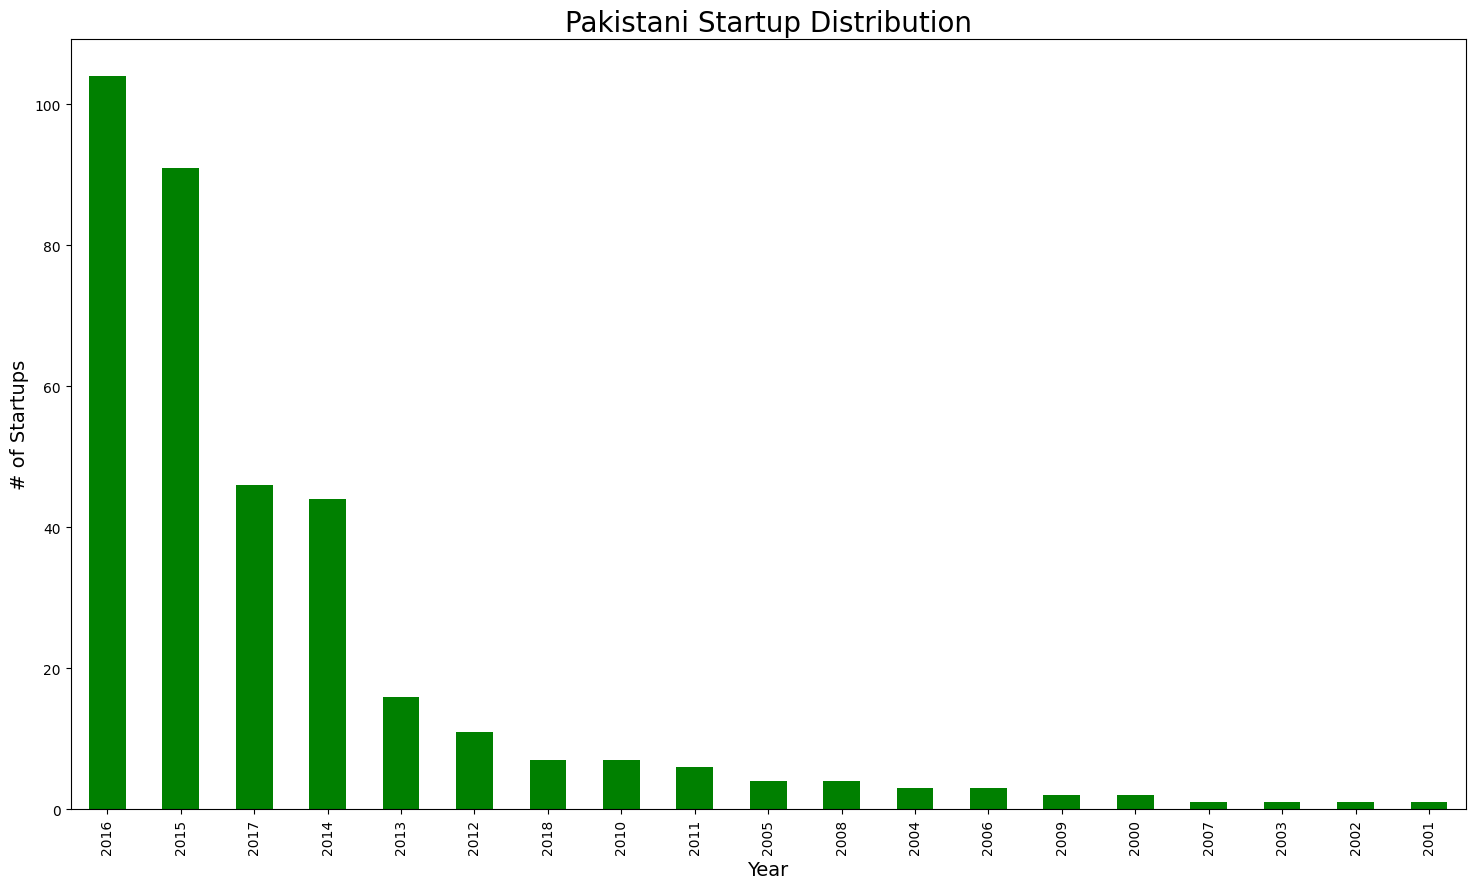

In [30]:
img = plt.imread('2020_7$largeimg_1108982037 (1).jpg')

plt.subplots(figsize=(18,10))
startup_dist.Founded.value_counts().plot(kind='bar', color='green')
plt.xlabel("Year", fontsize=14)
plt.ylabel("# of Startups", fontsize=14)
plt.title("Pakistani Startup Distribution", fontsize=20);

In [21]:
# Pakistan Map
Pakistan = folium.Map(location=[30.5,69.5], tiles='cartodbpositron',
                      min_zoom=3.5, max_zoom=12, zoom_start=5)

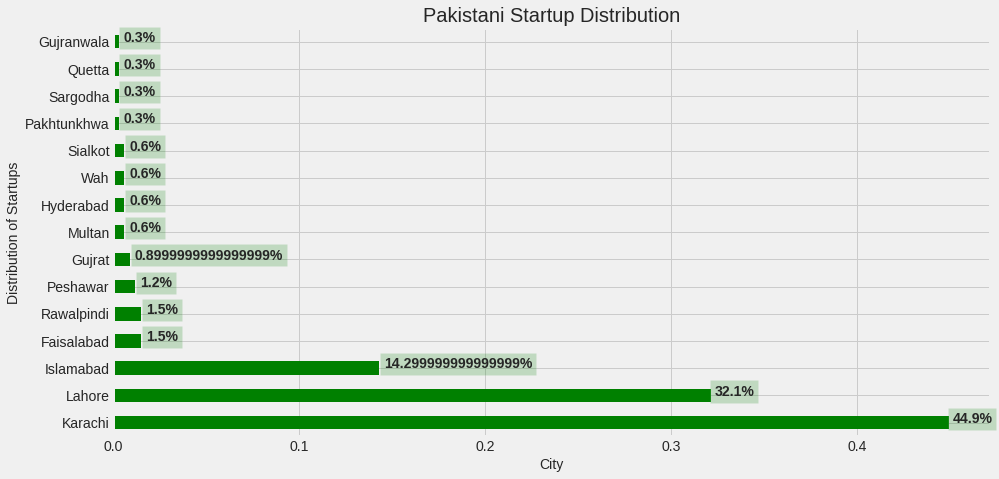

In [23]:
x = pak.City.value_counts(normalize=True).round(3).tolist()


plt.style.use('fivethirtyeight')
plt.subplots(figsize=(14,7))
pak.City.value_counts(normalize=True).plot(kind='barh',color='green')
for i, v in enumerate(x):
    plt.text(v+.0025, i, str(v*100)+'%', fontweight='bold',
            Bbox = dict(facecolor = 'green', alpha =.2))
plt.xlabel("City", fontsize=14)
plt.ylabel("Distribution of Startups", fontsize=14)
plt.title("Pakistani Startup Distribution", fontsize=20);

In [24]:
pak_g = pak.loc[pak['Founded'] >1999]

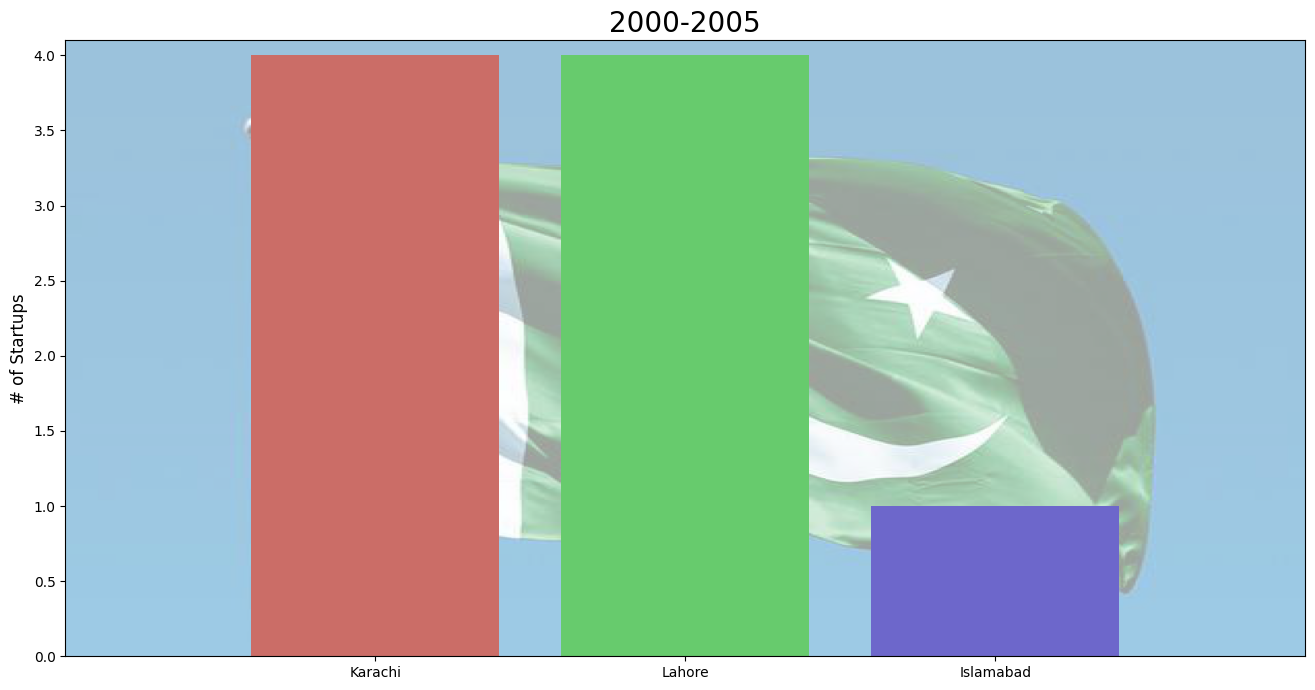

In [31]:
pak_2000s = pak_g.loc[pak_g['Founded'] <2006]

plt.style.use('default')
plt.figure(figsize=(16, 8))
ax = sns.countplot(pak_2000s['City'], palette='hls')

plt.imshow(img, aspect='auto', alpha=155, extent=[-1,3,0,4.1])

plt.xlabel('', fontsize=5)
plt.ylabel("# of Startups", fontsize=12)
plt.title("2000-2005", fontsize=20);

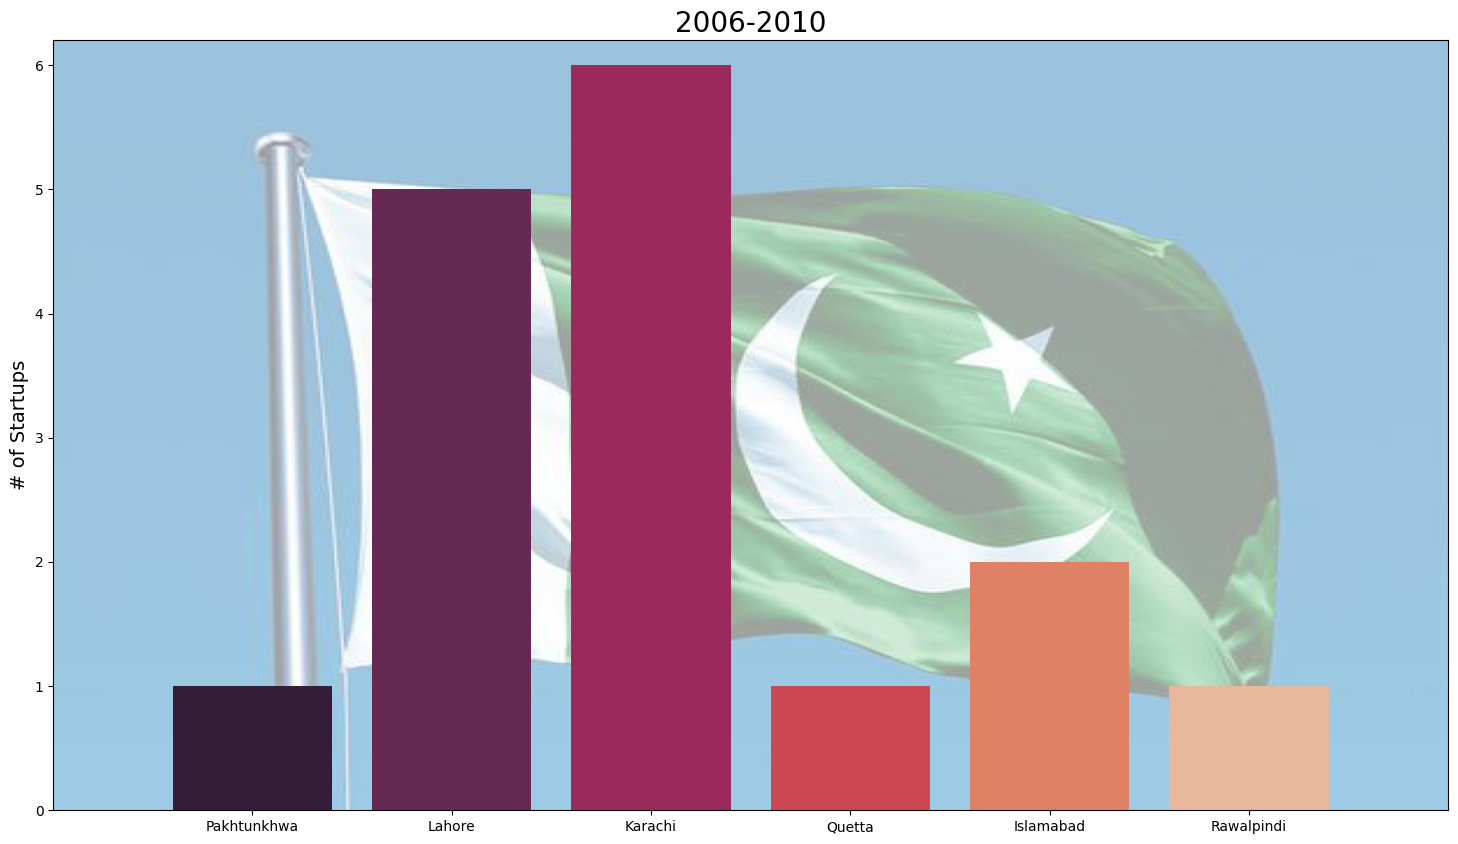

In [32]:
pak_2000ss = pak_g.loc[(pak_g['Founded']>2005) & (pak_g['Founded'] < 2011)]

plt.figure(figsize=(18,10))
ax = sns.countplot(pak_2000ss['City'], palette='rocket')
plt.xlabel('', fontsize=14)
plt.ylabel("# of Startups", fontsize=14)
plt.title("2006-2010", fontsize=20)
plt.imshow(img, aspect='auto', alpha=155, extent=[-1, 6, 0, 6.2]);

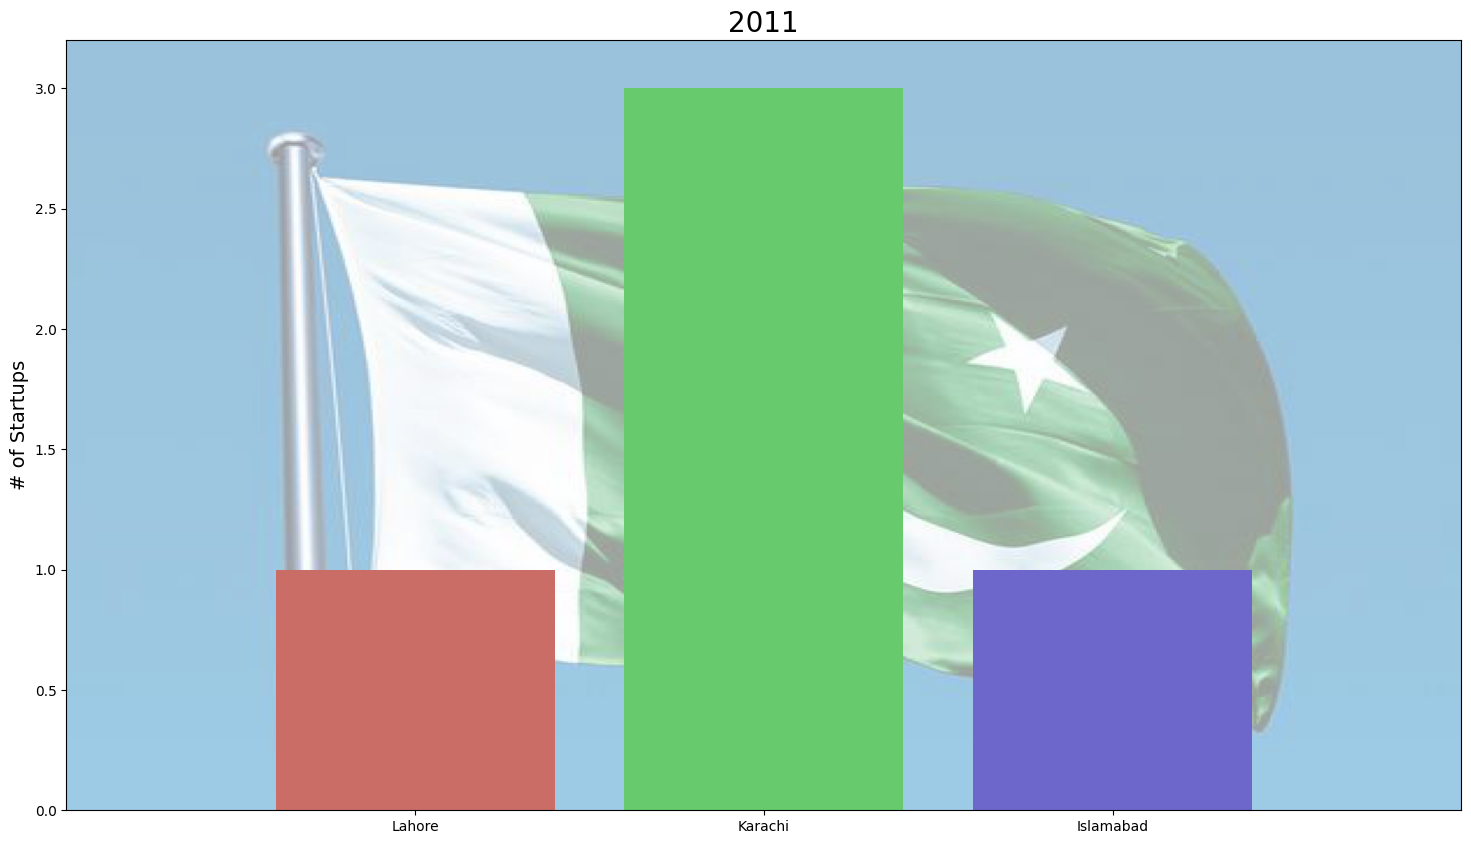

In [33]:
pak_2011 = pak_g.loc[pak_g['Founded']==2011]

plt.figure(figsize=(18,10))
ax = sns.countplot(pak_2011['City'], palette='hls')
plt.xlabel('', fontsize=14)
plt.ylabel("# of Startups", fontsize=14)
plt.title("2011", fontsize=20)
plt.imshow(img, aspect='auto', alpha=155, extent=[-1, 3, 0, 3.2]);

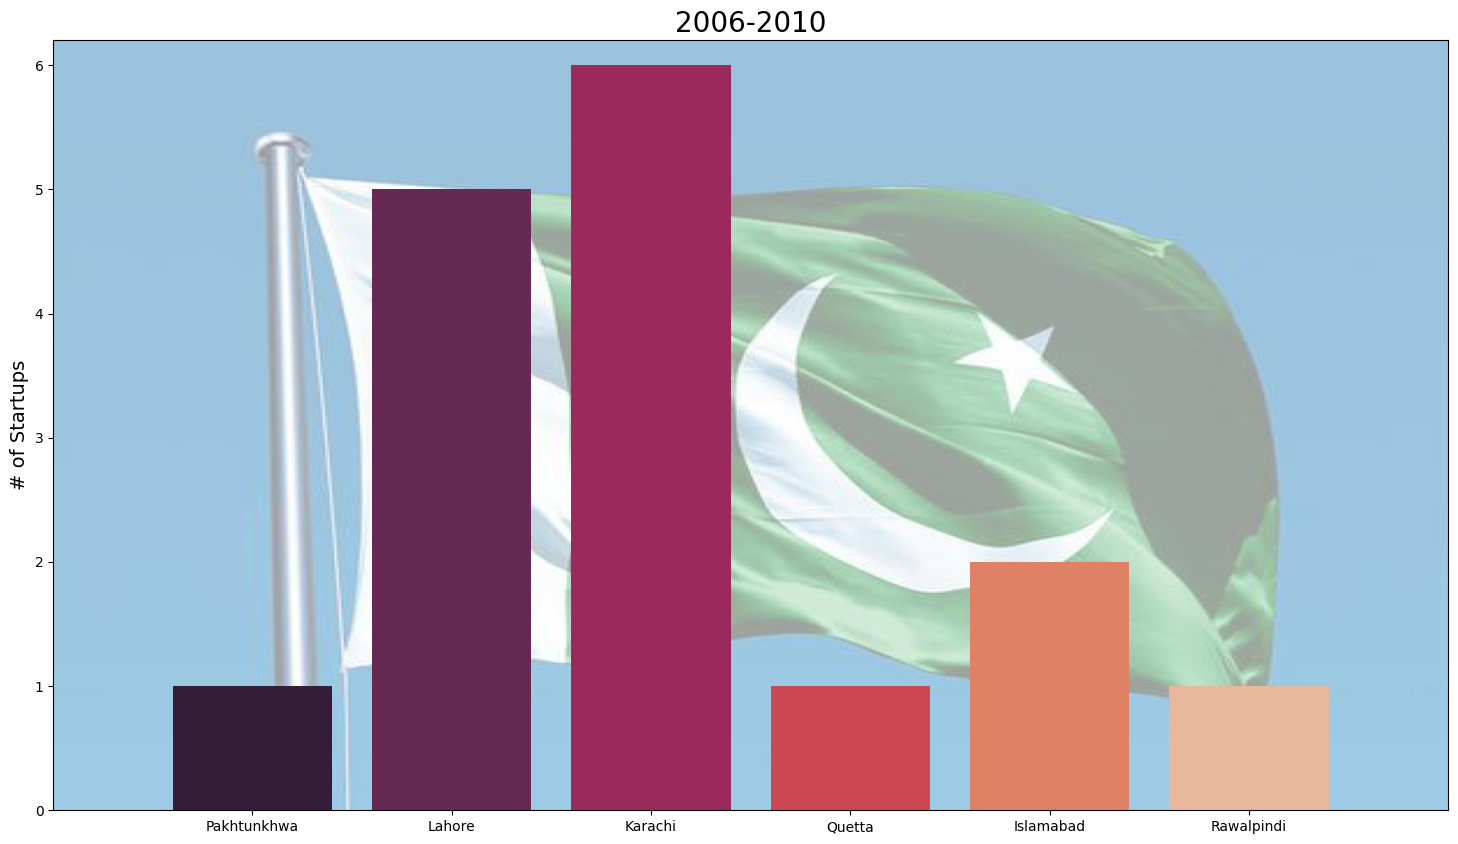

In [34]:
pak_2000ss = pak_g.loc[(pak_g['Founded']>2005) & (pak_g['Founded'] < 2011)]

plt.figure(figsize=(18,10))
ax = sns.countplot(pak_2000ss['City'], palette='rocket')
plt.xlabel('', fontsize=14)
plt.ylabel("# of Startups", fontsize=14)
plt.title("2006-2010", fontsize=20)
plt.imshow(img, aspect='auto', alpha=155, extent=[-1, 6, 0, 6.2]);

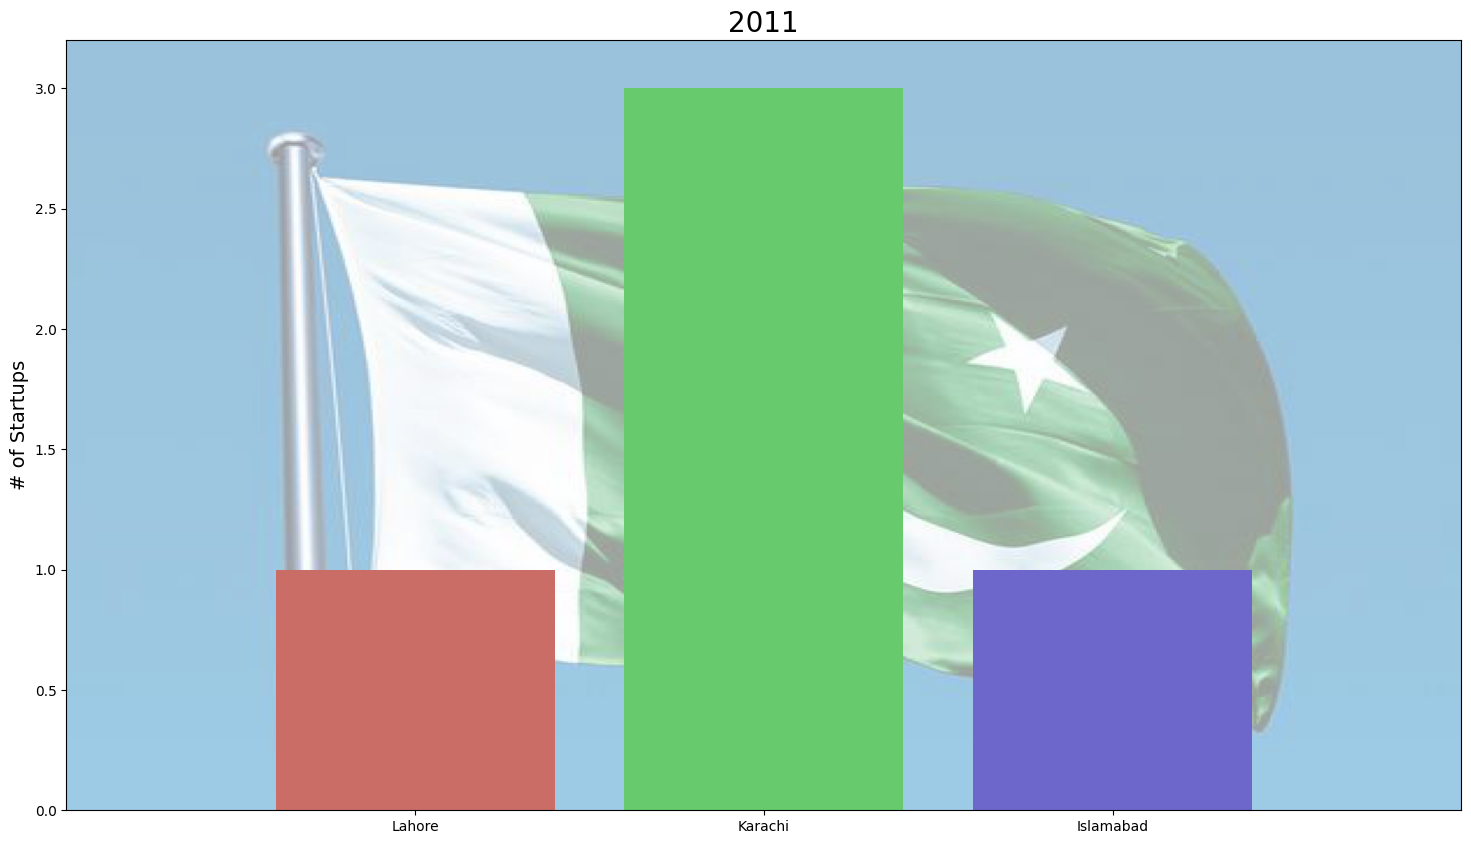

In [35]:
pak_2011 = pak_g.loc[pak_g['Founded']==2011]

plt.figure(figsize=(18,10))
ax = sns.countplot(pak_2011['City'], palette='hls')
plt.xlabel('', fontsize=14)
plt.ylabel("# of Startups", fontsize=14)
plt.title("2011", fontsize=20)
plt.imshow(img, aspect='auto', alpha=155, extent=[-1, 3, 0, 3.2]);

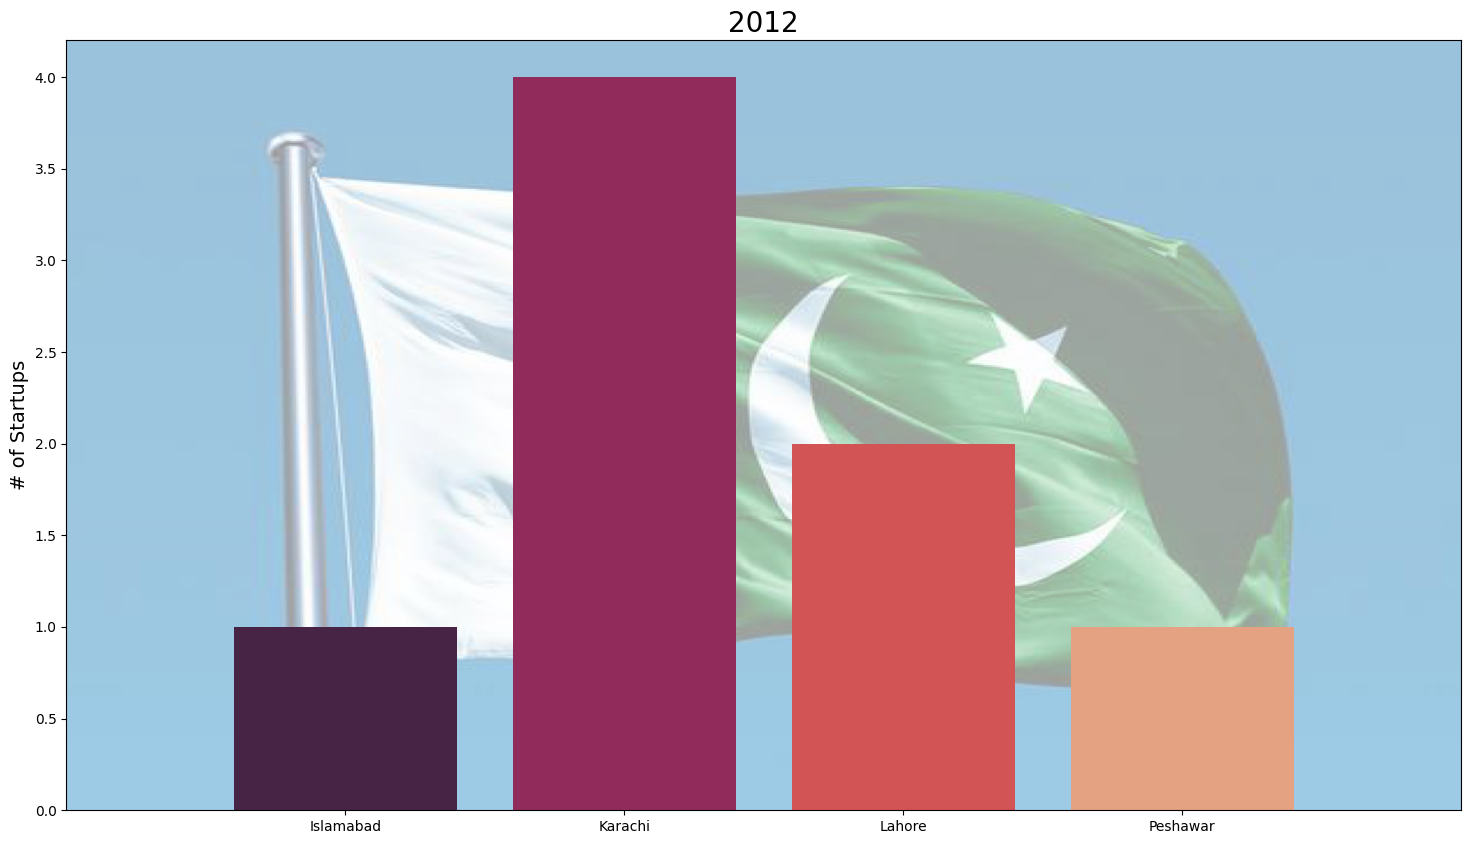

In [36]:
pak_2012 = pak_g.loc[pak_g['Founded']==2012]

plt.figure(figsize=(18, 10))
ax = sns.countplot(pak_2012['City'], palette='rocket')
plt.xlabel('', fontsize=14)
plt.ylabel("# of Startups", fontsize=14)
plt.title("2012", fontsize=20)
plt.imshow(img, aspect='auto', alpha=155, extent=[-1, 4, 0, 4.2]);

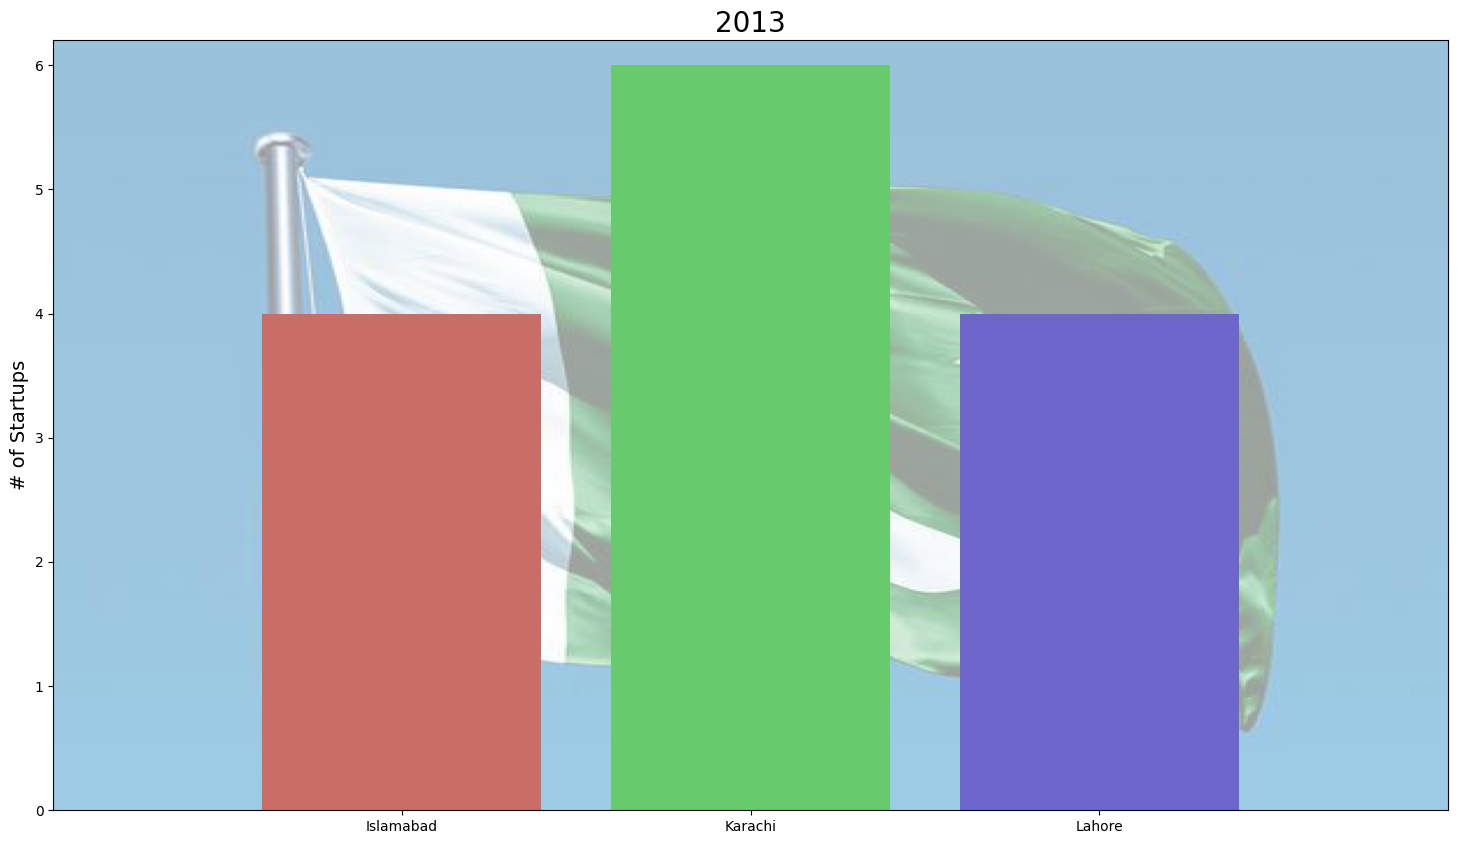

In [37]:
pak_2013 = pak_g.loc[pak_g['Founded']==2013]

plt.figure(figsize=(18, 10))
ax = sns.countplot(pak_2013['City'], palette='hls')
plt.xlabel('', fontsize=14)
plt.ylabel("# of Startups", fontsize=14)
plt.title("2013", fontsize=20)
plt.imshow(img, aspect='auto', alpha=155, extent=[-1, 3, 0, 6.2]);

Text(0.5, 1.0, '2014')

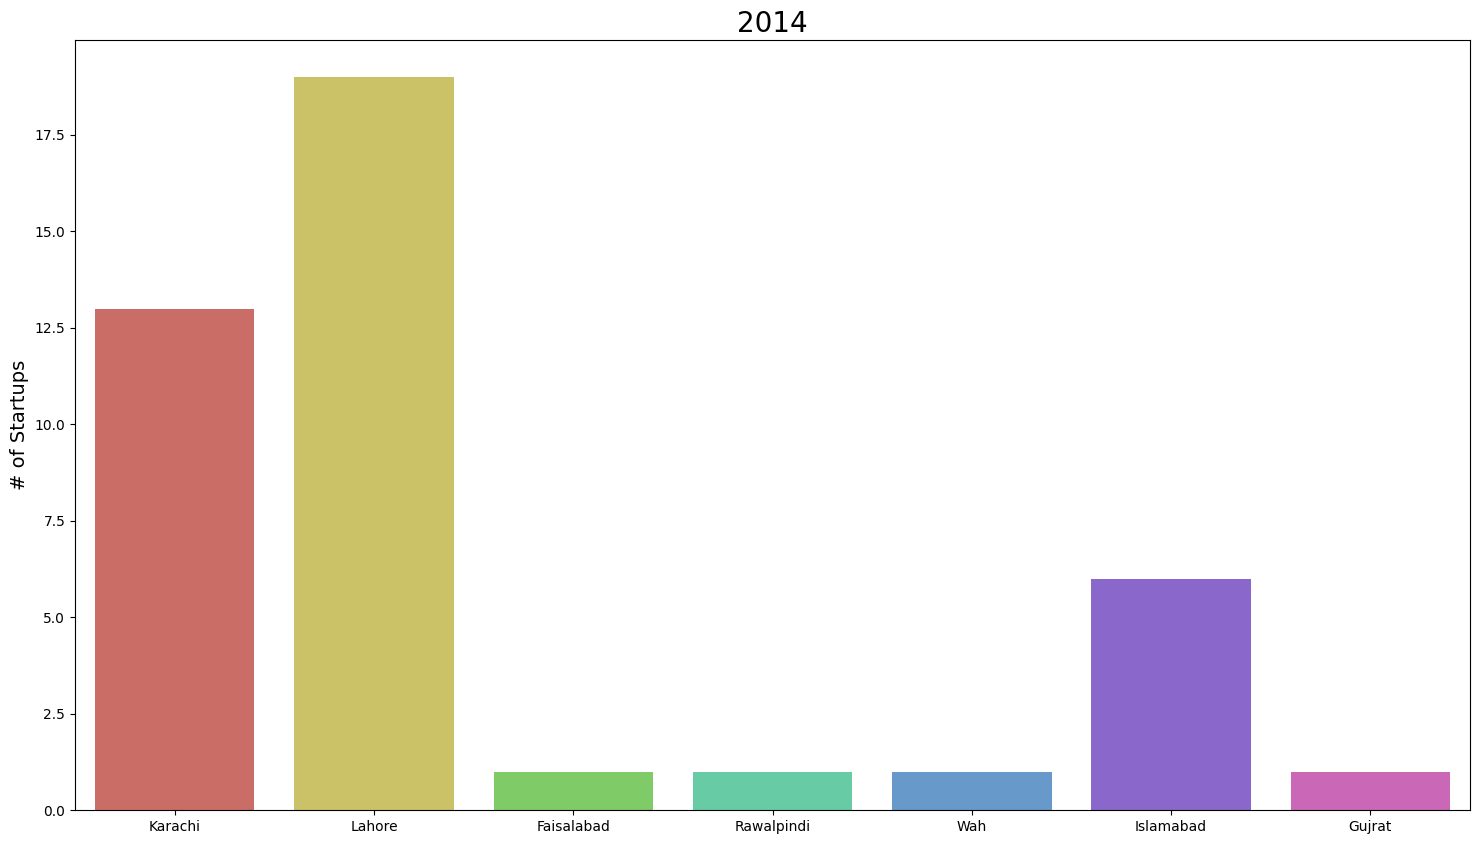

In [40]:
pak_2014 = pak_g.loc[pak_g['Founded']==2014]

plt.figure(figsize=(18, 10))
ax = sns.countplot(pak_2014['City'], palette='hls')
plt.xlabel('', fontsize=14)
plt.ylabel("# of Startups", fontsize=14)
plt.title("2014", fontsize=20)


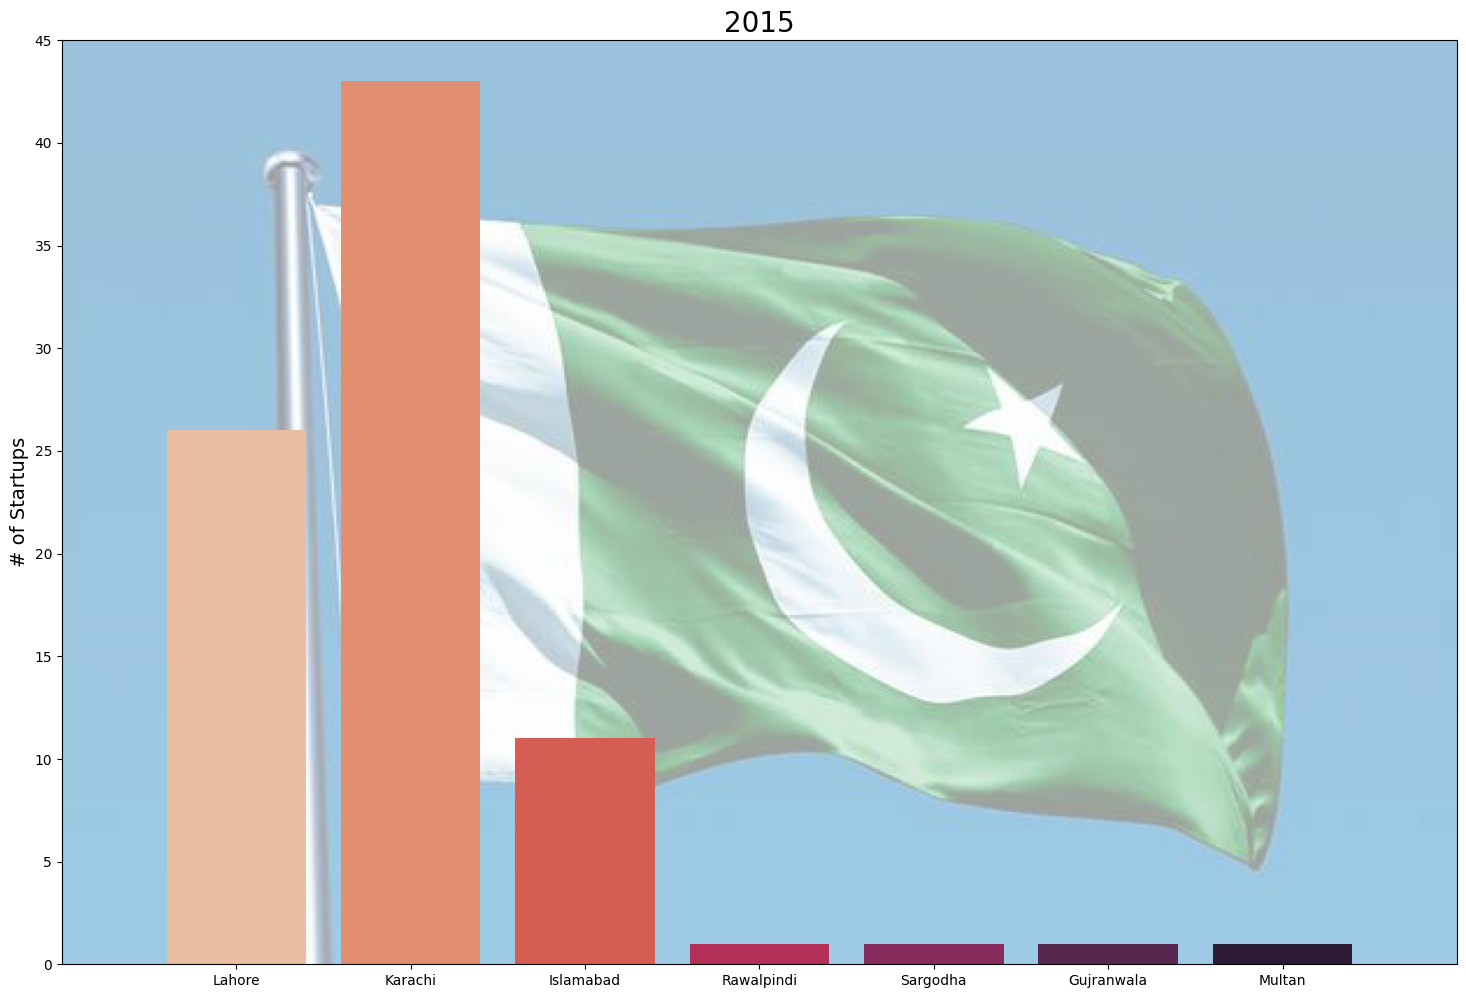

In [41]:
pak_2015 = pak_g.loc[pak_g['Founded']==2015]

plt.figure(figsize=(18, 12))
ax = sns.countplot(pak_2015['City'], palette='rocket_r')
plt.xlabel('', fontsize=14)
plt.ylabel("# of Startups", fontsize=14)
plt.title("2015", fontsize=20)
plt.imshow(img, aspect='auto', alpha=155, extent=[-1, 7, 0, 45]);

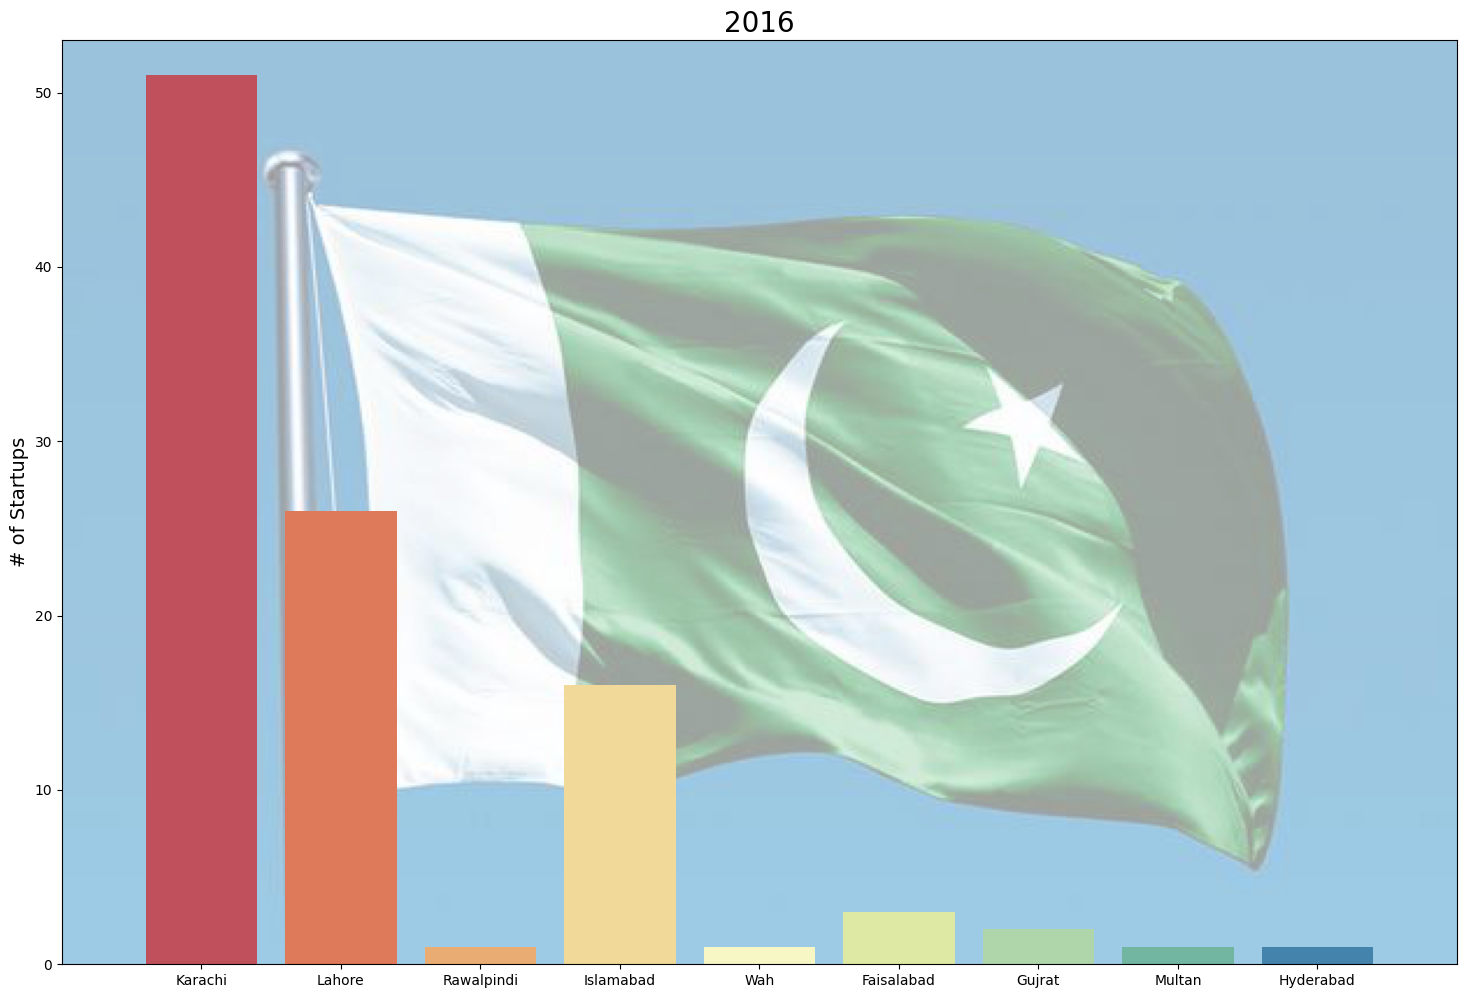

In [42]:
pak_2016 = pak_g.loc[pak_g['Founded']==2016]

plt.figure(figsize=(18,12))
ax = sns.countplot(pak_2016['City'], palette='Spectral')
plt.xlabel('', fontsize=14)
plt.ylabel("# of Startups", fontsize=14)
plt.title("2016", fontsize=20)
plt.imshow(img, aspect='auto', alpha=155, extent=[-1, 9, 0, 53]);

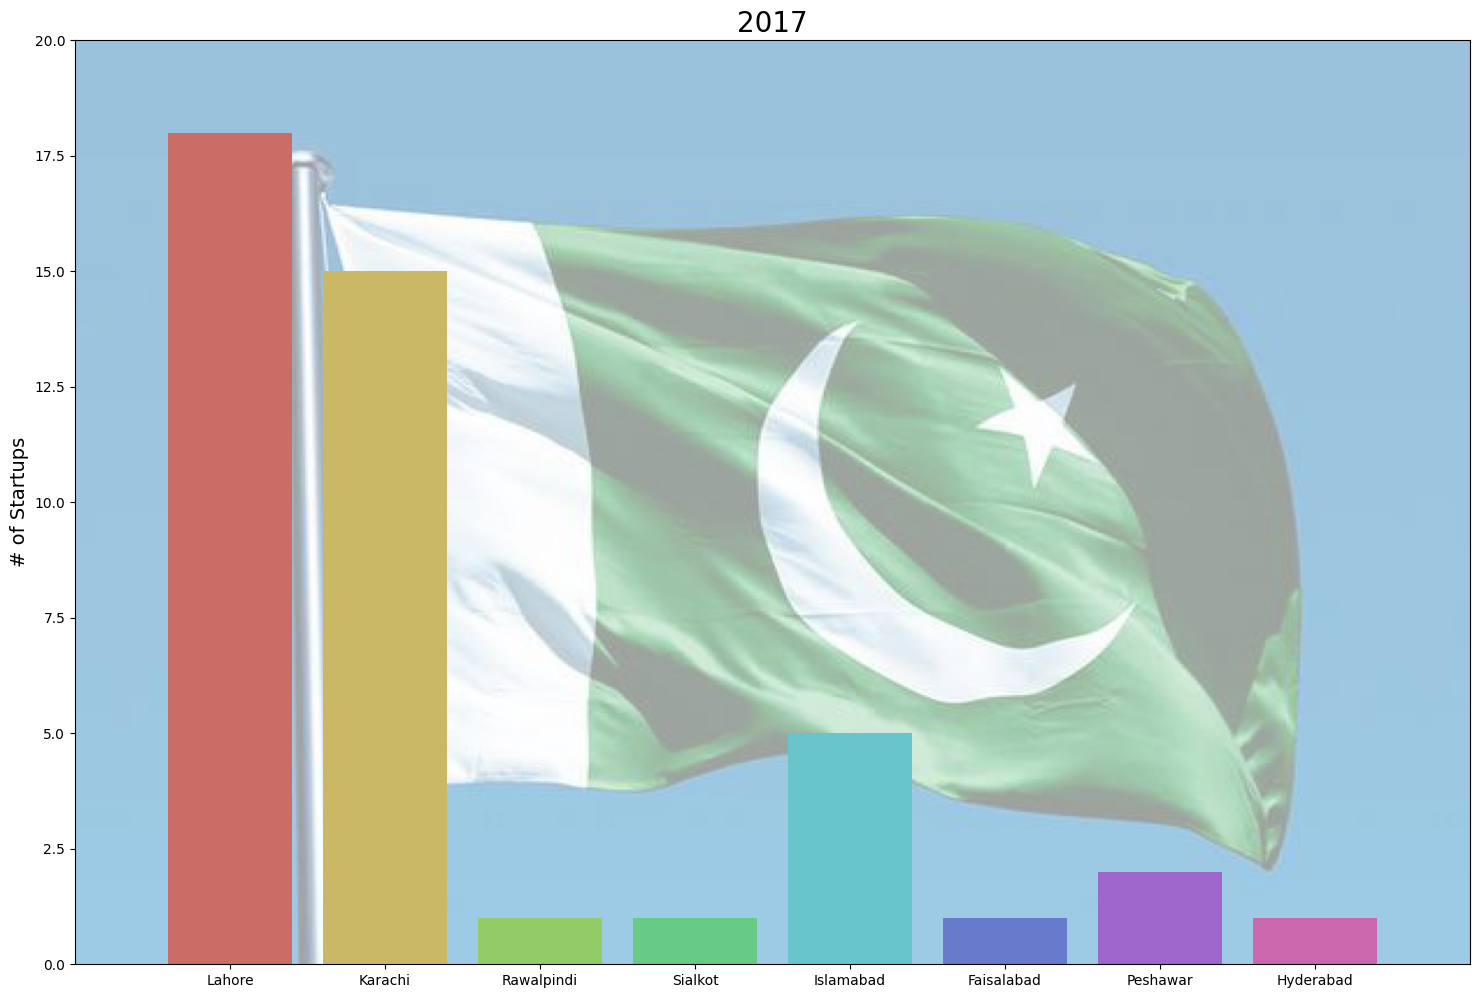

In [43]:
pak_2017 = pak_g.loc[pak_g['Founded']==2017]

plt.figure(figsize=(18,12))
ax = sns.countplot(pak_2017['City'], palette='hls')
plt.xlabel('', fontsize=14)
plt.ylabel("# of Startups", fontsize=14)
plt.title("2017", fontsize=20)
plt.imshow(img, aspect='auto', alpha=155, extent=[-1, 8, 0, 20]);

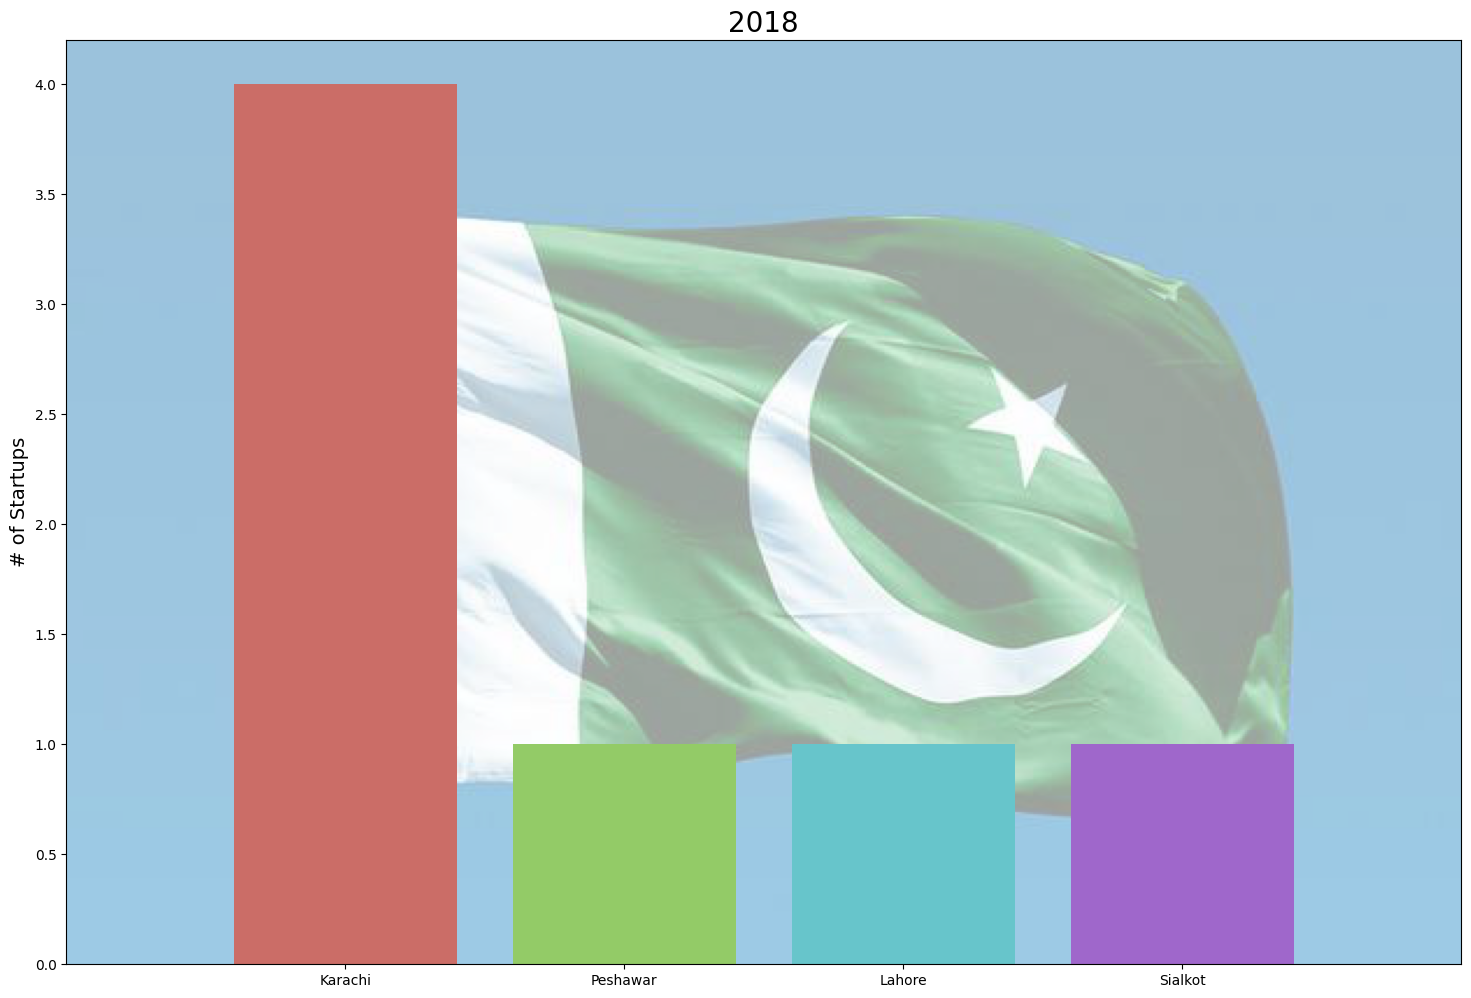

In [44]:
pak_2018 = pak_g.loc[pak_g['Founded']==2018]

plt.figure(figsize=(18,12))
ax = sns.countplot(pak_2018['City'], palette='hls')
plt.xlabel('', fontsize=14)
plt.ylabel("# of Startups", fontsize=14)
plt.title("2018", fontsize=20)
plt.imshow(img, aspect='auto', alpha=155, extent=[-1, 4, 0, 4.2]);